In [1]:
import os
import sys

# Quick setup - replace with your actual dataset name
DATASET_NAME = "edhec-input"  # Your dataset name here
dataset_path = f"/kaggle/input/{DATASET_NAME}"

# Add MULTIPLE modules to path
module_paths = [
    f"{dataset_path}/modules_ex", # custom modules here
    f"{dataset_path}",            # root path
    f"{dataset_path}/nb",
    os.getcwd()
]

for path in module_paths:
    if path not in sys.path:
        sys.path.insert(0, path)

# Set data path for easy access
DATA_PATH = f"{dataset_path}/data"

# Debugging: show what is available
print("✅ Setup complete!")
print(f"Dataset path: {dataset_path}")
print("Module search paths added:")
for i, path in enumerate(module_paths):
    exists = "✓" if os.path.exists(path) else "✗"
    print(f" {i+1}. {exists} {path}")

# Show available Python files
print("\nAvailble Python Modules:")
for path in module_paths:
    if os.path.exists:
        py_files = [f for f in os.listdir(path) if f.endswith('.py')]
        if py_files:
            print (f"  📁 {path}:")
            for f in sorted(py_files):
                print(f"    📄 {f}")

✅ Setup complete!
Dataset path: /kaggle/input/edhec-input
Module search paths added:
 1. ✓ /kaggle/input/edhec-input/modules_ex
 2. ✓ /kaggle/input/edhec-input
 3. ✓ /kaggle/input/edhec-input/nb
 4. ✓ /kaggle/working

Availble Python Modules:
  📁 /kaggle/input/edhec-input/modules_ex:
    📄 hello.py
  📁 /kaggle/input/edhec-input:
    📄 setup.py
  📁 /kaggle/input/edhec-input/nb:
    📄 edhec_risk_kit_104.py
    📄 edhec_risk_kit_105.py
    📄 edhec_risk_kit_106.py
    📄 edhec_risk_kit_107.py
    📄 edhec_risk_kit_108.py
    📄 edhec_risk_kit_109.py
    📄 edhec_risk_kit_110.py
    📄 edhec_risk_kit_111.py
    📄 edhec_risk_kit_118.py
    📄 edhec_risk_kit_119.py
    📄 edhec_risk_kit_121.py
    📄 edhec_risk_kit_123.py
    📄 edhec_risk_kit_124.py
    📄 edhec_risk_kit_125.py
    📄 edhec_risk_kit_126.py
    📄 edhec_risk_kit_127.py
    📄 edhec_risk_kit_128.py
    📄 edhec_risk_kit_129.py


# Efficient Frontier

## importing data

In [2]:
import pandas as pd
industries = pd.read_csv(f"{DATA_PATH}/ind30_m_vw_rets.csv", 
                         header=0, 
                         index_col=0,
                         # parse_dates=True
                        )/100
# for debug you can use: prices = pd.read_csv("../data/Portfolios_Formed_on_ME_monthly_EW.csv")

In [3]:
industries.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
192607,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
192608,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
192609,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
192610,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
192611,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


modifications needed:
- dates parsed as integers

In [4]:
industries.index = pd.to_datetime(industries.index, format="%Y%m")
industries.index = industries.index.to_period('M')

In [5]:
industries.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [6]:
industries.columns

Index(['Food ', 'Beer ', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth ',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin  ', 'Other'],
      dtype='object')

modifications needed:
- column names have embedded space " " which will cause problems when we look up
  (e.g. "Fin" will have error when we call "Fin  " column)

In [7]:
# Fixes the column spaces with strip()
industries.columns = industries.columns.str.strip()

In [8]:
industries.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

In [9]:
industries.shape

(1110, 30)

/kaggle/input/edhec-input/nb/edhec_risk_kit_129.py:36: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if filetype is "returns":
/kaggle/input/edhec-input/nb/edhec_risk_kit_129.py:39: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif filetype is "nfirms":
/kaggle/input/edhec-input/nb/edhec_risk_kit_129.py:42: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif filetype is "size":


<Axes: >

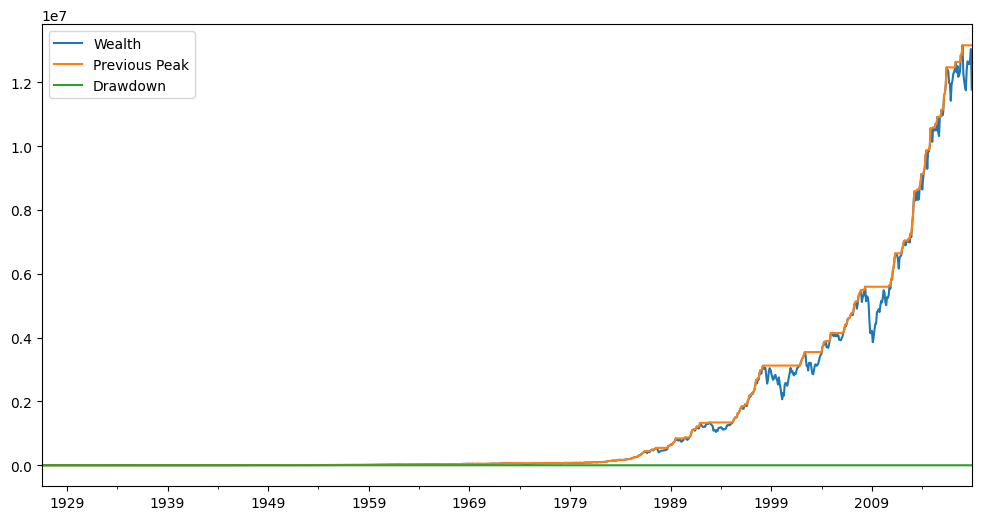

In [10]:
import edhec_risk_kit_129 as erk
erk.drawdown(industries["Food"]).plot.line(figsize=(12,6))

In [11]:
cols_of_interest = ["Food", "Smoke", "Coal", "Beer", "Fin"]
erk.var_gaussian(industries[cols_of_interest], modified=True)

Food     0.061207
Smoke    0.080292
Coal     0.047359
Beer     0.033881
Fin      0.075199
dtype: float64

In [12]:
erk.var_gaussian(industries, modified=True).sort_values().tail()

Carry    0.094527
Meals    0.098403
BusEq    0.099377
Games    0.100701
Mines    0.102782
dtype: float64

In [13]:
erk.var_gaussian(industries, modified=True).sort_values().head()

Beer     0.033881
Coal     0.047359
Food     0.061207
Telcm    0.064719
Hshld    0.064886
dtype: float64

<Axes: >

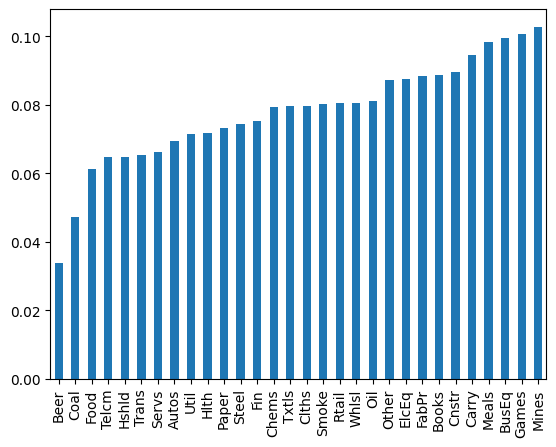

In [14]:
erk.var_gaussian(industries, modified=True).sort_values().plot.bar()

<Axes: >

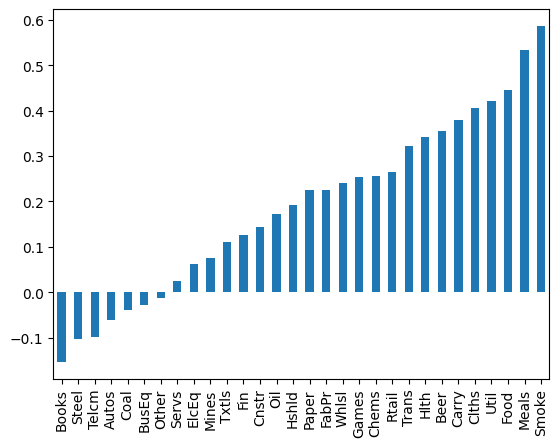

In [21]:
erk.sharpe_ratio(industries["2000":],0.03,12) .sort_values().plot.bar()

<Axes: >

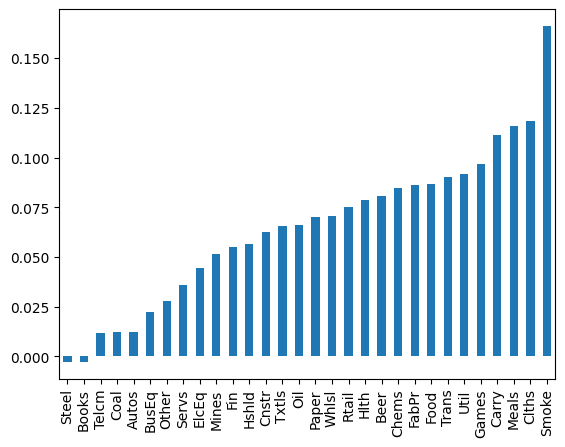

In [26]:
expReturn = erk.annualize_rets(industries["2000":], 12)
expReturn.sort_values().plot.bar()

In [28]:
covariance = industries["2000":].cov()
covariance

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.001277,0.000945,0.001302,0.001282,0.001136,0.000811,0.001103,0.000774,0.001254,0.001570,...,0.000928,0.000755,0.000728,0.001120,0.000937,0.000961,0.000896,0.000944,0.001124,0.000874
Beer,0.000945,0.001608,0.001103,0.000889,0.000751,0.000946,0.000805,0.000792,0.000879,0.001065,...,0.000742,0.000499,0.000521,0.000987,0.000840,0.000659,0.000665,0.000800,0.000842,0.000784
Smoke,0.001302,0.001103,0.004250,0.001177,0.001142,0.001013,0.000931,0.000910,0.001143,0.001072,...,0.001014,0.000768,0.000828,0.001207,0.000862,0.001143,0.000557,0.000944,0.001153,0.001119
Games,0.001282,0.000889,0.001177,0.005442,0.003231,0.001334,0.003145,0.001475,0.003245,0.004660,...,0.002449,0.003194,0.003767,0.002530,0.002606,0.002537,0.002336,0.002182,0.002971,0.002615
Books,0.001136,0.000751,0.001142,0.003231,0.003616,0.001162,0.002415,0.001291,0.002585,0.004015,...,0.002073,0.002178,0.002467,0.002297,0.002096,0.002166,0.001871,0.001572,0.002582,0.002051
Hshld,0.000811,0.000946,0.001013,0.001334,0.001162,0.001485,0.001103,0.000855,0.001164,0.001684,...,0.000876,0.000840,0.000929,0.001298,0.001047,0.000905,0.000808,0.000883,0.001101,0.001209
Clths,0.001103,0.000805,0.000931,0.003145,0.002415,0.001103,0.003730,0.000909,0.002493,0.003835,...,0.001724,0.001960,0.002445,0.002148,0.002294,0.001856,0.002270,0.002015,0.002412,0.001797
Hlth,0.000774,0.000792,0.000910,0.001475,0.001291,0.000855,0.000909,0.001594,0.001298,0.001455,...,0.001124,0.001227,0.001402,0.001129,0.001017,0.001195,0.000913,0.000862,0.001287,0.001259
Chems,0.001254,0.000879,0.001143,0.003245,0.002585,0.001164,0.002493,0.001298,0.003534,0.003632,...,0.001918,0.002261,0.002621,0.002475,0.002389,0.002013,0.001888,0.001810,0.002485,0.002143
Txtls,0.001570,0.001065,0.001072,0.004660,0.004015,0.001684,0.003835,0.001455,0.003632,0.007950,...,0.002481,0.002596,0.003278,0.003219,0.003124,0.002689,0.002869,0.002480,0.003379,0.002810
